In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel('final_feat.xlsx')

In [6]:
df.head()

,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Created Date,Location Zip_x,Income_x,Year Month,Completed Jobs,Income_y,Lead Calls,Canceled Jobs_x,Future Scheduled Jobs,Location Zip_y,tech_count,Avg_job_per_day,county_name,TMAX,TMIN,Total Leads,Total Jobs,Avg Service,Avg Install,Canceled Jobs_y,Turn over %,Canceled %,Avg Sales,bookedjob,totalcalls,Booking rate
0,Thursday,3181.56,13361,156,0.0117,20.39,26.77,0.0486,118.86,0.5337,0.2676,0.1987,2020-01-02,90049,137581.58,2020 January,57,23933.54,60,8.0,63,90049,59,1,Los Angeles,65,51,10,101,143.417833,3224.412750,8,9.900990,7.920792,3617.444828,49,155,31.612903
1,Friday,2684.67,16841,160,0.0095,16.78,21.00,0.0299,127.84,0.5477,0.3122,0.1401,2020-01-03,92262,43204.73,2020 January,77,65232.03,64,7.0,81,92262,40,2,Riverside,71,44,9,89,75.515208,965.365854,7,10.112360,7.865169,1781.345385,56,176,31.818182
2,Saturday,1338.36,30788,142,0.0046,9.43,11.00,0.0186,121.67,0.5297,0.3158,0.1545,2020-01-04,92606,14709.40,2020 January,55,26195.32,58,4.0,61,92606,21,3,Orange,69,56,3,31,110.019048,1377.666667,4,9.677419,12.903226,459.248750,30,92,32.608696
3,Sunday,1192.31,12865,108,0.0084,11.04,5.00,0.0130,238.46,0.5741,0.3349,0.0910,2020-01-05,90638,3725.40,2020 January,6,264.00,32,1.0,6,90638,9,1,Los Angeles,69,52,2,15,67.914286,406.250000,1,13.333333,6.666667,846.000000,11,52,21.153846
4,Monday,2383.17,49514,188,0.0038,12.68,22.00,0.0566,108.33,0.6027,0.3596,0.0377,2020-01-06,90045,74598.75,2020 January,73,48506.16,62,5.0,82,90045,60,2,Los Angeles,77,60,8,91,78.753750,1646.943488,5,8.791209,5.494505,1820.060789,54,159,33.962264


In [7]:
df1=df[['Completed Jobs','tech_count','TMAX','Avg Sales','Location Zip_y','Income_y']]
    

In [8]:
Mean_encoded_subject =df1.groupby(['Location Zip_y'])['Income_y'].mean().to_dict() 
  
df1['Zip_income'] = df1['Location Zip_y'].map(Mean_encoded_subject) 


df1=df1.drop(['Location Zip_y'],axis=1)
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df1.head()

,Completed Jobs,tech_count,TMAX,Avg Sales,Income_y,Zip_income
0,57,59,65,3617.444828,23933.54,23933.540
1,77,40,71,1781.345385,65232.03,74498.870
2,55,21,69,459.248750,26195.32,110329.465
3,6,9,69,846.000000,264.00,32925.410
4,73,60,77,1820.060789,48506.16,83225.340


In [10]:
76**3*1.7543

770095.5967999999

In [11]:
df1.head()

,Completed Jobs,tech_count,TMAX,Avg Sales,Income_y,Zip_income
0,57,59,65,3617.444828,23933.54,23933.540
1,77,40,71,1781.345385,65232.03,74498.870
2,55,21,69,459.248750,26195.32,110329.465
3,6,9,69,846.000000,264.00,32925.410
4,73,60,77,1820.060789,48506.16,83225.340


In [12]:
df1['f1']=np.abs(df1['Completed Jobs'])*np.abs(df1['Zip_income'])
df1['f2']=np.sqrt(df1['Completed Jobs']**3)*np.abs(df1['Avg Sales'])
df1['f3']=np.abs(np.sqrt(df1['Completed Jobs']) - np.sqrt(df1['tech_count']))
df1['f4']=np.log(np.sqrt(df1['Completed Jobs'])*df1['TMAX']**3)

In [13]:
df1.columns

Index(['Completed Jobs', 'tech_count', 'TMAX', 'Avg Sales', 'Income_y',
       'Zip_income', 'f1', 'f2', 'f3', 'f4'],
      dtype='object')

In [15]:
df1=df1[[ 'f1','f2', 'f3', 'f4','Income_y']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


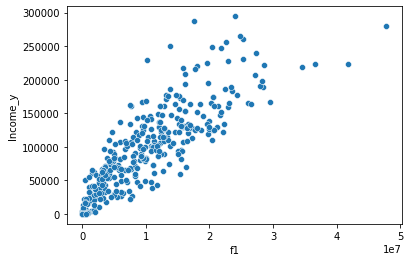

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


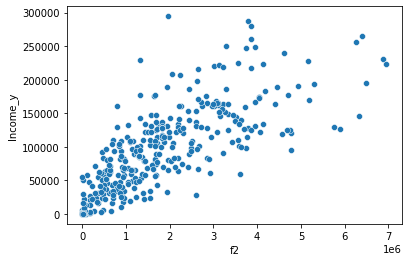

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


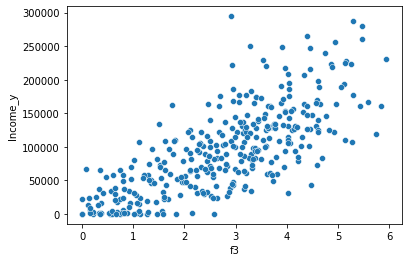

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


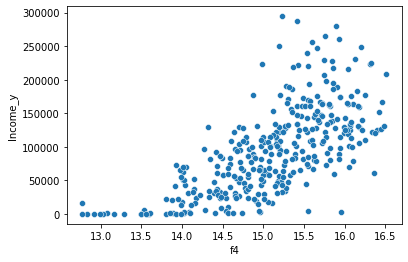

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


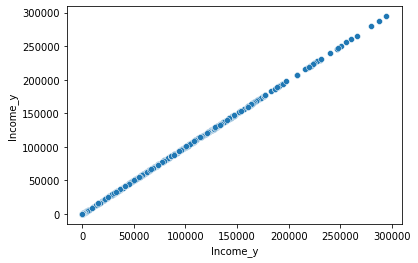

In [16]:
for i in df1.columns:
    sns.scatterplot(df1[i],df1['Income_y'])
    plt.show()

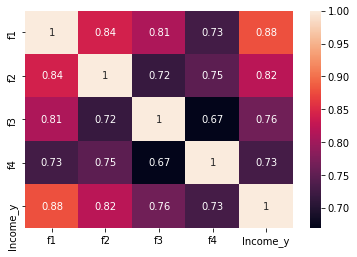

In [17]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [18]:
train=df1[0:300]
test=df1[300:]

In [19]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()


In [21]:
X=scaler.fit_transform(X)

In [22]:

y=y.values
y=y.reshape(-1,1)

In [23]:

y=scaler.fit_transform(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras.models import Sequential


In [27]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim =4))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam', loss='MeanSquaredError', metrics = ['MeanSquaredError'])


In [28]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 100,validation_data=(X_test,y_test))


Epoch 1/100
8/8 [==============================] - 1s 67ms/step - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 7/100
8/8 [============================

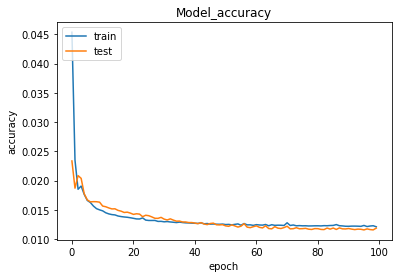

In [29]:
# Accuracy plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

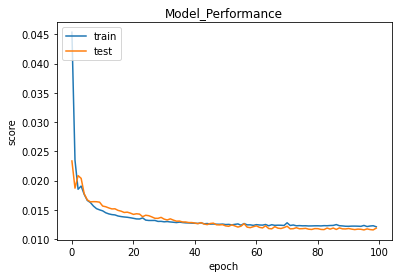

In [30]:
# Accuracy plot 
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model_Performance')
plt.ylabel('score')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [31]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [32]:
X_.isnull().sum()

f1    0
f2    0
f3    0
f4    0
dtype: int64

In [33]:
X_['Avg Install'].median()

KeyError: ignored

In [34]:
X_['Avg Install']=X_['Avg Install'].fillna(2298.813953488)

KeyError: ignored

In [35]:


X_=scaler.fit_transform(X_)


In [36]:
y_pred_1 = model.predict(X_test)

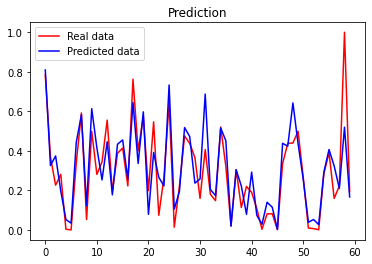

In [37]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred_1, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [38]:
y_pred_2=model.predict(X_)

In [39]:
y_=y_.values
y_=y_.reshape(-1,1)

In [40]:
y_=scaler.fit_transform(y_)

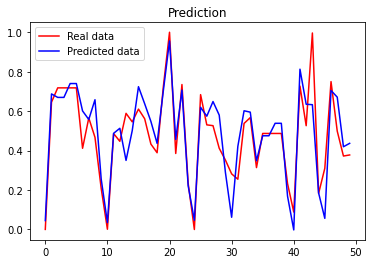

In [41]:
plt.plot(y_, color = 'red', label = 'Real data')
plt.plot(y_pred_2, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [42]:
y_pred_2=scaler.inverse_transform(y_pred_2)

In [43]:
y_pred_2

array([[  8118.673  ],
       [121969.86   ],
       [118834.54   ],
       [118834.54   ],
       [131299.23   ],
       [131299.23   ],
       [106657.516  ],
       [ 99004.55   ],
       [116745.78   ],
       [ 45438.543  ],
       [  6298.468  ],
       [ 86539.414  ],
       [ 91071.66   ],
       [ 62207.457  ],
       [ 89062.12   ],
       [128469.14   ],
       [113104.625  ],
       [ 97250.27   ],
       [ 77512.02   ],
       [124634.68   ],
       [169573.97   ],
       [ 81027.1    ],
       [125408.72   ],
       [ 39450.113  ],
       [  8368.026  ],
       [109911.336  ],
       [101941.14   ],
       [115116.13   ],
       [102920.42   ],
       [ 51309.38   ],
       [ 11088.438  ],
       [ 74858.695  ],
       [106824.6    ],
       [105570.58   ],
       [ 61811.625  ],
       [ 84341.37   ],
       [ 84341.37   ],
       [ 95557.93   ],
       [ 95557.93   ],
       [ 30062.479  ],
       [  -286.78784],
       [144195.77   ],
       [112676.53   ],
       [112

In [44]:
y_=scaler.inverse_transform(y_)

In [45]:
y_

array([[1.7600000e+02],
       [1.1453421e+05],
       [1.2741210e+05],
       [1.2741210e+05],
       [1.2741210e+05],
       [1.2741210e+05],
       [7.3107940e+04],
       [1.0033570e+05],
       [8.2920440e+04],
       [3.6992000e+04],
       [3.2600000e+02],
       [8.6287170e+04],
       [7.9380380e+04],
       [1.0450901e+05],
       [9.6828960e+04],
       [1.0832711e+05],
       [9.9625260e+04],
       [7.6878350e+04],
       [6.9089170e+04],
       [1.2821029e+05],
       [1.7741042e+05],
       [6.8424710e+04],
       [1.3040640e+05],
       [4.1651850e+04],
       [1.0295000e+02],
       [1.2132892e+05],
       [9.4156550e+04],
       [9.3428490e+04],
       [7.3106960e+04],
       [6.2484030e+04],
       [5.0088000e+04],
       [4.5289920e+04],
       [9.5437440e+04],
       [1.0067486e+05],
       [5.5735080e+04],
       [8.6421800e+04],
       [8.6421800e+04],
       [8.6421800e+04],
       [8.6421800e+04],
       [4.1343950e+04],
       [1.5788000e+04],
       [1.289855

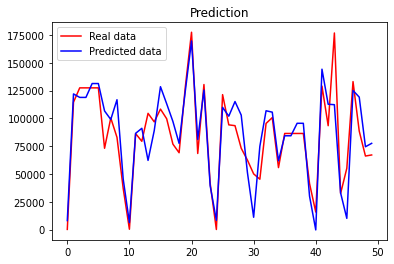

In [46]:
plt.plot(y_, color = 'red', label = 'Real data')
plt.plot(y_pred_2, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
mean_absolute_error(y_,y_pred_2)

14234.124613085938

In [50]:
np.sqrt(mean_squared_error(y_,y_pred_2))

19414.998762464922

In [51]:
np.sqrt(mean_squared_error(y_test,y_pred_1))

0.10903267405930146

In [52]:
from keras.models import load_model

In [53]:
model.save('forecast_2.h5')

In [54]:
loading_1=load_model('forecast_2.h5')

In [349]:

p=loading_1.predict([[0.80519481, 0.67346939, 0.79220779, 0.72727273, 0.57888889,
        0.27027027, 0.60106925]])


ValueError: ignored

In [350]:
scaler.inverse_transform(p)

NameError: ignored

In [351]:
df1[311:320]

,Completed Jobs,tech_count,TMAX,Avg Sales,Income_y
311,106,51,84,821.319479,86287.17
312,102,49,75,1401.394130,79380.38
313,50,23,70,2364.647059,104509.01
314,100,69,54,2631.463014,96828.96
315,127,55,61,1163.223478,108327.11
316,118,53,69,1402.703810,99625.26
317,105,43,65,1589.591250,76878.35
318,59,25,65,2339.931250,69089.17
319,125,68,61,1650.959186,128210.29


In [352]:
X_[11:20]

array([[0.68181818, 0.57142857, 0.89189189, 0.26351954],
       [0.65584416, 0.54545455, 0.64864865, 0.49953046],
       [0.31818182, 0.20779221, 0.51351351, 0.89144246],
       [0.64285714, 0.80519481, 0.08108108, 1.        ],
       [0.81818182, 0.62337662, 0.27027027, 0.40262763],
       [0.75974026, 0.5974026 , 0.48648649, 0.50006332],
       [0.67532468, 0.46753247, 0.37837838, 0.57610091],
       [0.37662338, 0.23376623, 0.37837838, 0.88138651],
       [0.80519481, 0.79220779, 0.27027027, 0.60106925]])

In [55]:
!pip install -U keras-tuner


     |████████████████████████████████| 71kB 3.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=c425328c42a7ff56d24ca2114f9d4b8fad0919b51f8c0a106890988c19e68b96
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=133f2cb11bd361f1774ecc9ef098ed4cead9914d7b72407ac698dd4a09734f60
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [56]:
from kerastuner.tuners import RandomSearch


In [57]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 40)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=1024,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='MeanSquaredError',
        metrics=['MeanSquaredError'])
    return model

In [58]:
from tensorflow import keras
from kerastuner import HyperModel


In [59]:
tuner = RandomSearch(build_model,objective='val_loss',max_trials=10,executions_per_trial=3)


In [60]:
tuner.search(X_train,y_train,epochs=100,validation_data= (X_test,y_test))


Trial 10 Complete [00h 03m 01s]
val_loss: 0.0471628171702226

Best val_loss So Far: 0.011414228317638239
Total elapsed time: 00h 39m 42s
INFO:tensorflow:Oracle triggered exit


In [61]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 4
units_0: 960
units_1: 608
learning_rate: 0.0001
units_2: 640
units_3: 800
units_4: 352
units_5: 512
units_6: 288
units_7: 800
units_8: 640
units_9: 256
units_10: 864
units_11: 192
units_12: 576
units_13: 928
units_14: 800
units_15: 352
units_16: 480
units_17: 704
units_18: 864
units_19: 672
units_20: 64
units_21: 384
units_22: 640
units_23: 320
units_24: 416
units_25: 736
units_26: 992
units_27: 768
units_28: 992
units_29: 896
units_30: 704
units_31: 928
units_32: 352
units_33: 192
units_34: 64
units_35: 544
units_36: 64
Score: 0.011414228317638239
Trial summary
Hyperparameters:
num_layers: 35
units_0: 800
units_1: 320
learning_rate: 0.0001
units_2: 384
units_3: 640
units_4: 544
units_5: 512
units_6: 896
units_7: 416
units_8: 800
units_9: 256
units_10: 544
units_11: 192
units_12: 96
units_13: 832
units_14: 672
units_15: 192
units_

In [62]:
from keras.optimizers import Adam

In [ ]:
Hyperparameters:
num_layers: 4
units_0: 960
units_1: 608
learning_rate: 0.0001
units_2: 640
units_3: 800
units_4: 352

In [63]:
model = Sequential()
model.add(Dense(960, activation = 'relu', input_dim =4))
model.add(Dense(608, activation = 'relu'))
model.add(Dense(640, activation = 'relu'))
model.add(Dense(800, activation = 'relu'))
model.add(Dense(1,activation = 'linear'))
model.compile(optimizer=Adam(lr=0.0001), loss='MeanSquaredError', metrics = ['MeanSquaredError'])


In [64]:
hist=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
8/8 [==============================] - 1s 51ms/step - loss: 0.1254 - mean_squared_error: 0.1254 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 2/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 3/100
8/8 [==============================] - 0s 28ms/step - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 4/100
8/8 [==============================] - 0s 27ms/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 5/100
8/8 [==============================] - 0s 30ms/step - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 6/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 7/100
8/8 [=======================

In [65]:
y_pr=model.predict(X_)

In [66]:
scaler.inverse_transform(y_pr)

array([[  3346.5747],
       [124392.305 ],
       [109785.95  ],
       [109785.95  ],
       [122452.18  ],
       [122452.18  ],
       [ 95912.9   ],
       [ 93608.    ],
       [115285.95  ],
       [ 41792.688 ],
       [  1713.2551],
       [ 78793.414 ],
       [ 79881.16  ],
       [ 58358.008 ],
       [ 81561.31  ],
       [123488.31  ],
       [106794.01  ],
       [ 93534.12  ],
       [ 72704.05  ],
       [121142.625 ],
       [163048.36  ],
       [ 73072.805 ],
       [117489.13  ],
       [ 37229.016 ],
       [  4566.138 ],
       [105464.97  ],
       [ 91343.61  ],
       [111093.36  ],
       [ 88923.27  ],
       [ 54399.543 ],
       [  4311.4175],
       [ 71291.945 ],
       [ 96727.33  ],
       [ 95682.89  ],
       [ 66681.11  ],
       [ 80308.55  ],
       [ 80308.55  ],
       [ 91235.055 ],
       [ 91235.055 ],
       [ 24205.688 ],
       [   278.2425],
       [140571.7   ],
       [115181.49  ],
       [108840.695 ],
       [ 25064.285 ],
       [  

In [67]:
y_

array([[1.7600000e+02],
       [1.1453421e+05],
       [1.2741210e+05],
       [1.2741210e+05],
       [1.2741210e+05],
       [1.2741210e+05],
       [7.3107940e+04],
       [1.0033570e+05],
       [8.2920440e+04],
       [3.6992000e+04],
       [3.2600000e+02],
       [8.6287170e+04],
       [7.9380380e+04],
       [1.0450901e+05],
       [9.6828960e+04],
       [1.0832711e+05],
       [9.9625260e+04],
       [7.6878350e+04],
       [6.9089170e+04],
       [1.2821029e+05],
       [1.7741042e+05],
       [6.8424710e+04],
       [1.3040640e+05],
       [4.1651850e+04],
       [1.0295000e+02],
       [1.2132892e+05],
       [9.4156550e+04],
       [9.3428490e+04],
       [7.3106960e+04],
       [6.2484030e+04],
       [5.0088000e+04],
       [4.5289920e+04],
       [9.5437440e+04],
       [1.0067486e+05],
       [5.5735080e+04],
       [8.6421800e+04],
       [8.6421800e+04],
       [8.6421800e+04],
       [8.6421800e+04],
       [4.1343950e+04],
       [1.5788000e+04],
       [1.289855

In [68]:
model.save('forecast_nueral_fs.h5')

In [69]:
loading_3=load_model('forecast_nueral_fs.h5')

In [72]:
pr=loading_3.predict([[0.25017035, 0.59841874, 0.39976689, 0.70064452]])

In [73]:
scaler.inverse_transform(pr)

array([[69674.79]], dtype=float32)

In [70]:
X_[40:50]

array([[0.01468342, 0.00694429, 0.12743328, 0.        ],
       [0.82016379, 1.        , 0.77304533, 0.51617891],
       [0.49793805, 0.91404707, 0.61161885, 0.63505825],
       [0.60776264, 0.48684928, 0.53719036, 0.70232676],
       [0.04112142, 0.15544443, 0.49817451, 0.45687425],
       [0.0462717 , 0.00254049, 0.        , 0.40621443],
       [0.6969122 , 0.38912627, 0.71624789, 0.84779231],
       [0.61978718, 0.64781259, 0.54293519, 0.80906391],
       [0.29724454, 0.415307  , 0.36298704, 0.72769212],
       [0.25017035, 0.59841874, 0.39976689, 0.70064452]])

In [71]:
y_[40:50]

array([[ 15788.  ],
       [128985.55],
       [ 93402.16],
       [176747.02],
       [ 32502.4 ],
       [ 55111.85],
       [133042.85],
       [ 88538.89],
       [ 66133.39],
       [ 67090.81]])